In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

## Step 1: Data Exploration

### 1: Read and explore the dataset

In [41]:
df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')

# Strip trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns


/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_88215/1488339330.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')


Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [42]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,,2,3,1,0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30,1,1,1,,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,,1,1,0,,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24,1,1,1,,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34,1,1,0,,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30,1,1,0,,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [44]:
print(df.dtypes) 

customer_id                  object
customer_region              object
customer_age                 object
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                  object
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

found some missmatches here which dosent make sense in the datatype format

In [45]:
print(df.columns)

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')


In [46]:
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')
df['first_order'] = pd.to_numeric(df['first_order'], errors='coerce')
df['HR_0'] = pd.to_numeric(df['HR_0'], errors='coerce').fillna(0).astype(int)



In [47]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


customer_id                   0
customer_region               0
customer_age                727
vendor_count                  0
product_count                 0
is_chain                      0
first_order                 106
last_order                    0
last_promo                    0
payment_method                0
CUI_American                  0
CUI_Asian                     0
CUI_Beverages                 0
CUI_Cafe                      0
CUI_Chicken Dishes            0
CUI_Chinese                   0
CUI_Desserts                  0
CUI_Healthy                   0
CUI_Indian                    0
CUI_Italian                   0
CUI_Japanese                  0
CUI_Noodle Dishes             0
CUI_OTHER                     0
CUI_Street Food / Snacks      0
CUI_Thai                      0
DOW_0                         0
DOW_1                         0
DOW_2                         0
DOW_3                         0
DOW_4                         0
DOW_5                         0
DOW_6   

In [48]:
# Get data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [49]:
# Summary statistics for numeric columns
numeric_summary = df.describe(include=[np.number]).transpose()
numeric_summary



,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.506499,7.160898,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.102609,2.771587,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.668245,6.957287,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.818866,3.977529,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.478604,24.109086,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.675521,23.226123,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.880438,11.654018,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.960451,23.564351,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.300633,8.479734,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.801163,6.427132,0.0,0.0,0.0,0.00,326.10


2. 
vendor_count and product_count
Minimum values are 0: It’s unusual for a customer to have zero vendors or zero products if they’ve placed an order. Check if these zero values represent missing data or if they indicate customers who signed up but never ordered.

Maximum vendor_count is 41 and product_count is 269: These values are significantly higher than the median (2 for vendor_count and 3 for product_count), suggesting the presence of outliers. Consider checking these high values to see if they are legitimate or data errors.

Maximum value is 83: If is_chain is a binary indicator (0 or 1), values above 1 indicate data entry errors. If it is categorical, such as indicating the number of chain restaurants visited, it should be renamed to avoid confusion.

Hourly Order Counts (HR_0 to HR_23)
Mean values are very low: Suggesting that orders are sparse across most hours.
Maximum values are much higher than the mean: Some hours have up to 36 orders (HR_20), indicating significant variability. Consider plotting the hourly distributions to visualize when orders peak.

The presence of many zeros in the data: For many columns (e.g., hourly order counts and cuisine spending), the 75th percentile is still 0, indicating that a large proportion of entries are zeros.
Wide ranges in values: This suggests potential outliers, which could impact your analysis.


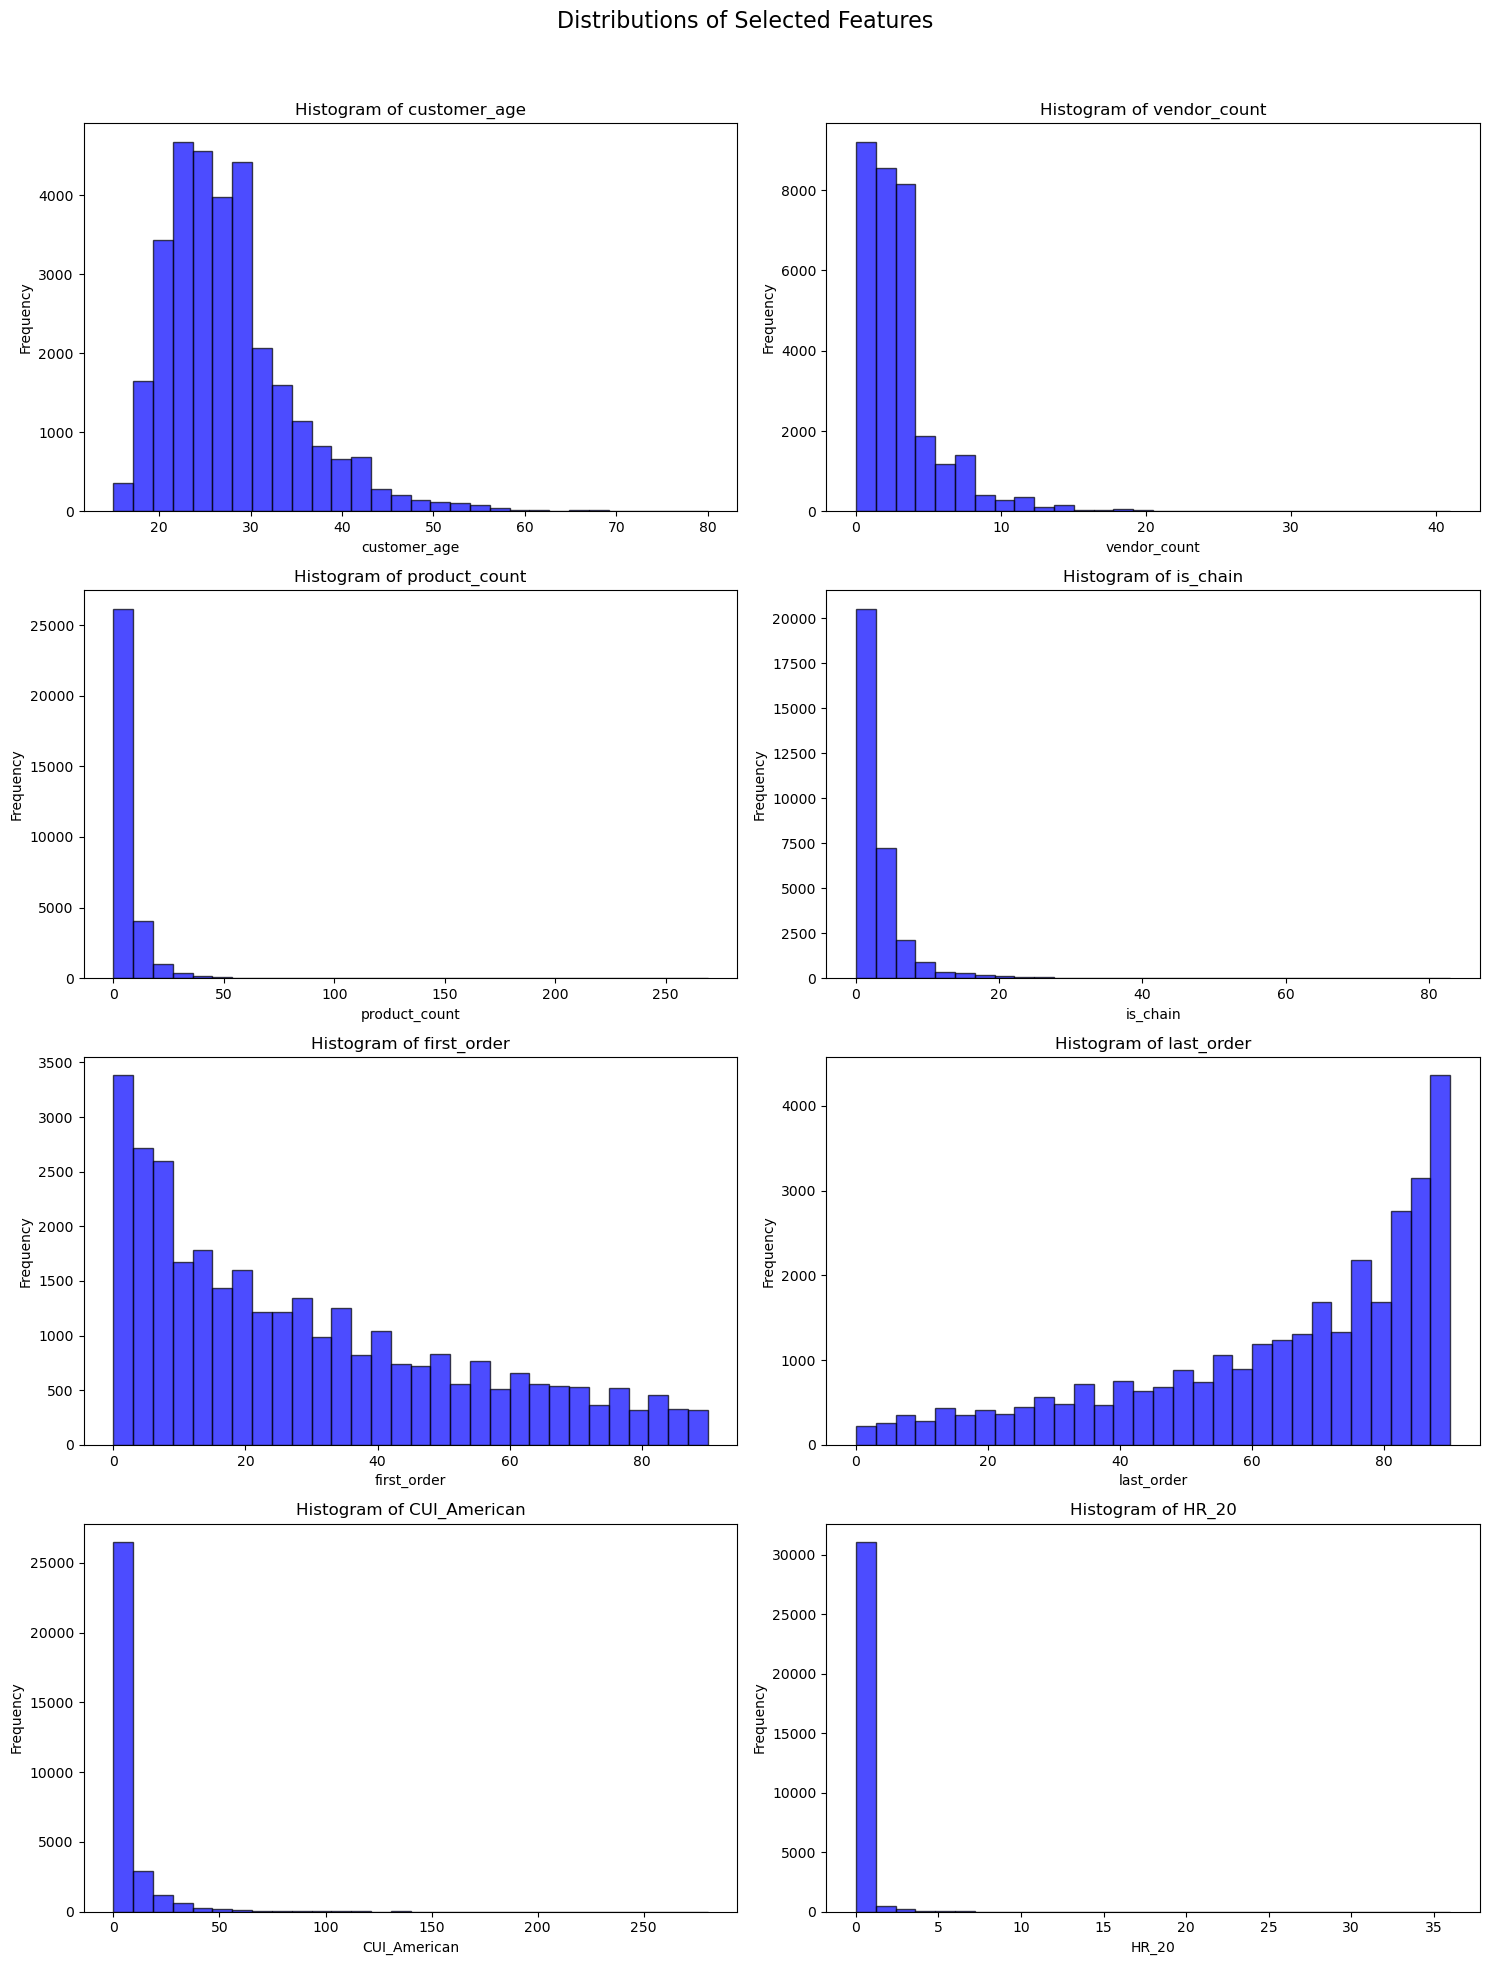

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe df is already loaded with the appropriate data

# Plotting histograms and boxplots for initial columns to check distributions
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American', 'HR_20'
]

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distributions of Selected Features', fontsize=16)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Generate histograms and boxplots for each column
for i, col in enumerate(columns_to_plot):
    # Histogram
    axs[i].hist(df[col].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

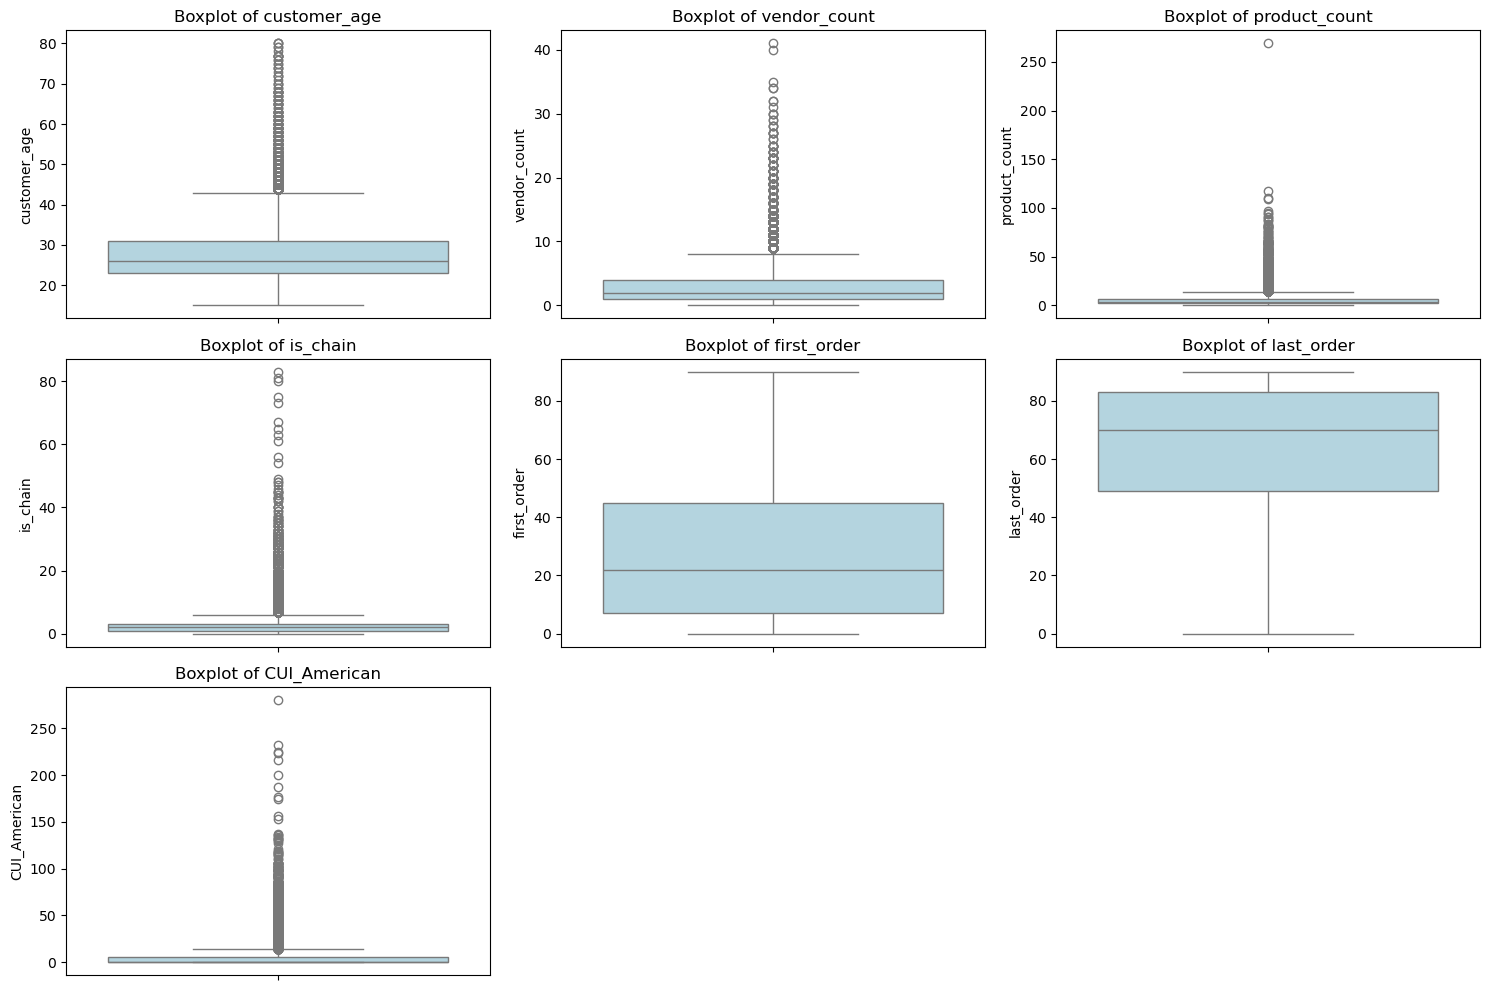

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American'
]

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plotting boxplots
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


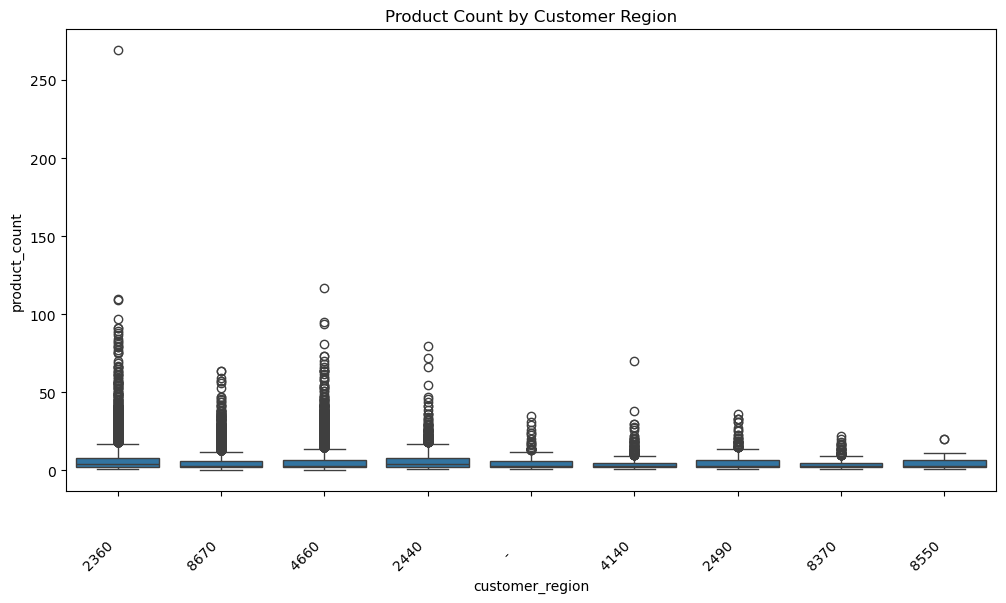

In [52]:
# Boxplot of product_count by customer_region
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_region', y='product_count', data=df)
plt.xticks(rotation=45)
plt.title('Product Count by Customer Region')
plt.show()


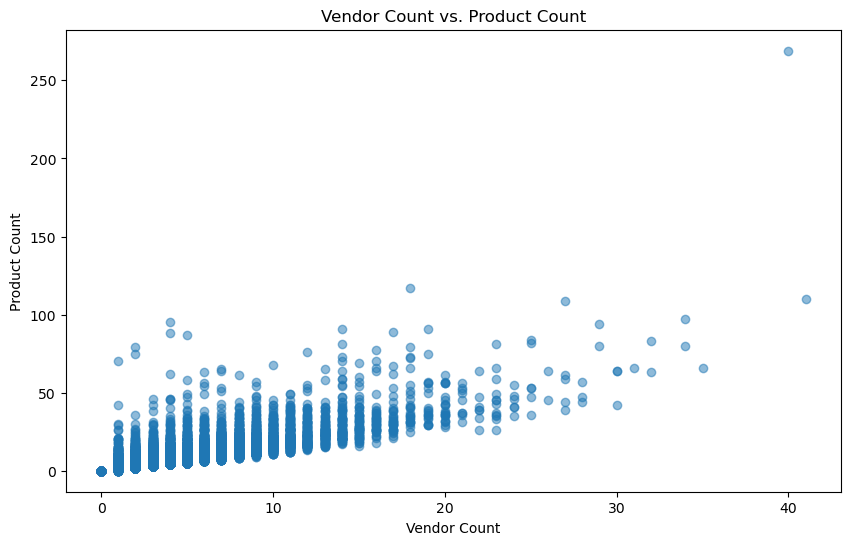

In [53]:
# Scatter plot of vendor_count vs. product_count
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'], alpha=0.5)
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.title('Vendor Count vs. Product Count')
plt.show()


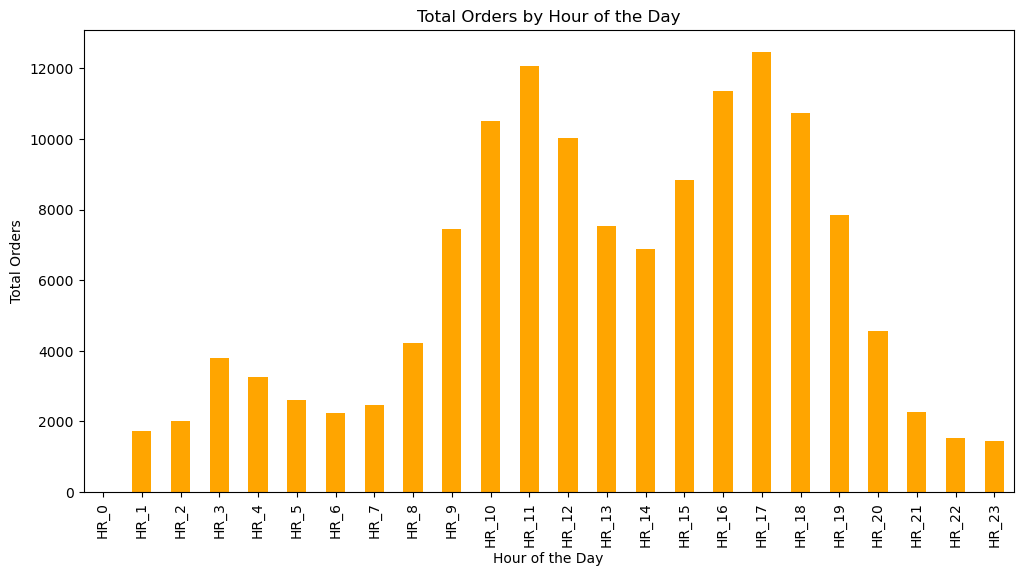

In [54]:
# Summing up orders for each hour column
hour_columns = [f'HR_{i}' for i in range(24)]
hourly_order_counts = df[hour_columns].sum()

# Plotting hourly order counts
plt.figure(figsize=(12, 6))
hourly_order_counts.plot(kind='bar', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.title('Total Orders by Hour of the Day')
plt.show()


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [56]:
# df.corr()
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

df_numeric = df.drop(columns=['customer_id', 'customer_region', 'last_promo', 'payment_method'])
corr_matrix = df_numeric.corr()

corr_matrix



Index(['customer_id', 'customer_region', 'last_promo', 'payment_method'], dtype='object')


,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_age,1.000000,0.000952,0.005372,0.001783,0.004643,0.012715,0.008004,0.013415,-0.003188,0.006515,...,0.006084,0.005325,0.004002,0.004836,0.008197,-0.003590,-0.003193,0.006217,-0.004439,0.000967
vendor_count,0.000952,1.000000,0.827636,0.762916,-0.386735,0.377479,0.272846,0.307482,0.215641,0.185358,...,0.333791,0.288602,0.309798,0.368721,0.398170,0.389441,0.310358,0.233004,0.192796,0.190071
product_count,0.005372,0.827636,1.000000,0.827071,-0.358568,0.350343,0.335848,0.337223,0.230520,0.273756,...,0.406931,0.393186,0.416981,0.463289,0.449943,0.418980,0.336397,0.235623,0.192515,0.186168
is_chain,0.001783,0.762916,0.827071,1.000000,-0.331144,0.298150,0.266221,0.109205,0.241524,0.237863,...,0.352830,0.308112,0.323691,0.418688,0.456111,0.451465,0.360529,0.253091,0.165580,0.154136
first_order,0.004643,-0.386735,-0.358568,-0.331144,1.000000,0.219895,-0.159178,-0.116353,-0.081930,-0.066465,...,-0.150666,-0.147372,-0.175380,-0.192134,-0.186134,-0.160559,-0.128709,-0.099894,-0.072124,-0.068770
last_order,0.012715,0.377479,0.350343,0.298150,0.219895,1.000000,0.150594,0.151368,0.076547,0.076308,...,0.154960,0.181077,0.181467,0.175733,0.152952,0.125928,0.097895,0.082626,0.070758,0.062984
CUI_American,0.008004,0.272846,0.335848,0.266221,-0.159178,0.150594,1.000000,0.095519,0.006829,0.089817,...,0.147189,0.197519,0.212734,0.181558,0.113253,0.059548,0.041387,0.025869,0.043275,0.051568
CUI_Asian,0.013415,0.307482,0.337223,0.109205,-0.116353,0.151368,0.095519,1.000000,0.093345,0.006014,...,0.058803,0.034119,0.025913,-0.009550,-0.039530,-0.054670,-0.045823,-0.037894,0.076690,0.140164
CUI_Beverages,-0.003188,0.215641,0.230520,0.241524,-0.081930,0.076547,0.006829,0.093345,1.000000,-0.021522,...,0.064185,0.007359,-0.025948,-0.006919,0.019311,0.042498,0.037647,0.027853,0.029024,0.038797
CUI_Cafe,0.006515,0.185358,0.273756,0.237863,-0.066465,0.076308,0.089817,0.006014,-0.021522,1.000000,...,0.115859,0.143299,0.154576,0.124378,0.074091,0.050702,0.025207,0.015363,0.007424,-0.001376


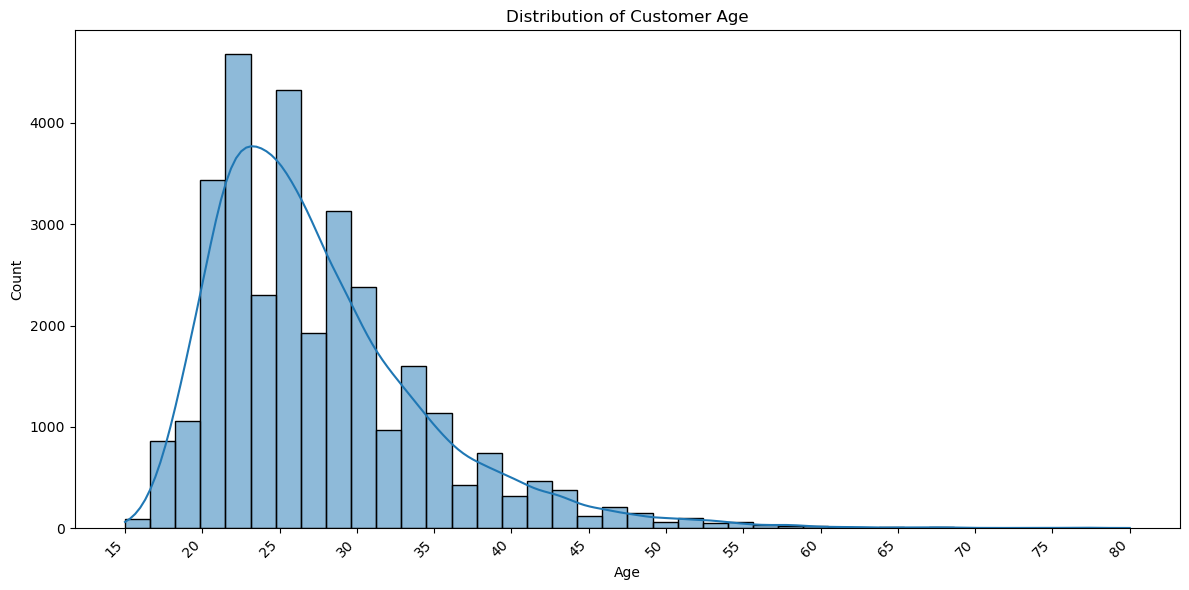

Minimum age: 15
Maximum age: 80
Mean age: 27.51
Median age: 26.0
Number of valid age entries: 31161
Number of missing or invalid age entries: 727


In [57]:
# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# Remove NaN values and sort
age_data = df['customer_age'].dropna().sort_values()

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(age_data, bins=40, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Improve x-axis readability
min_age = int(age_data.min())
max_age = int(age_data.max())
plt.xticks(range(min_age, max_age+1, 5))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Mean age: {age_data.mean():.2f}")
print(f"Median age: {age_data.median()}")
print(f"Number of valid age entries: {len(age_data)}")
print(f"Number of missing or invalid age entries: {len(df) - len(age_data)}")

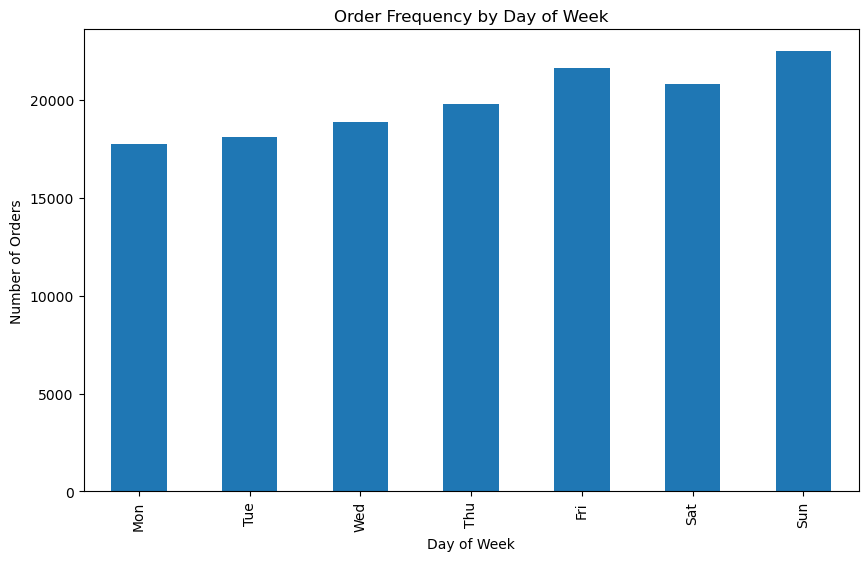

In [58]:
dow_order = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum()
plt.figure(figsize=(10, 6))
dow_order.plot(kind='bar')
plt.title('Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

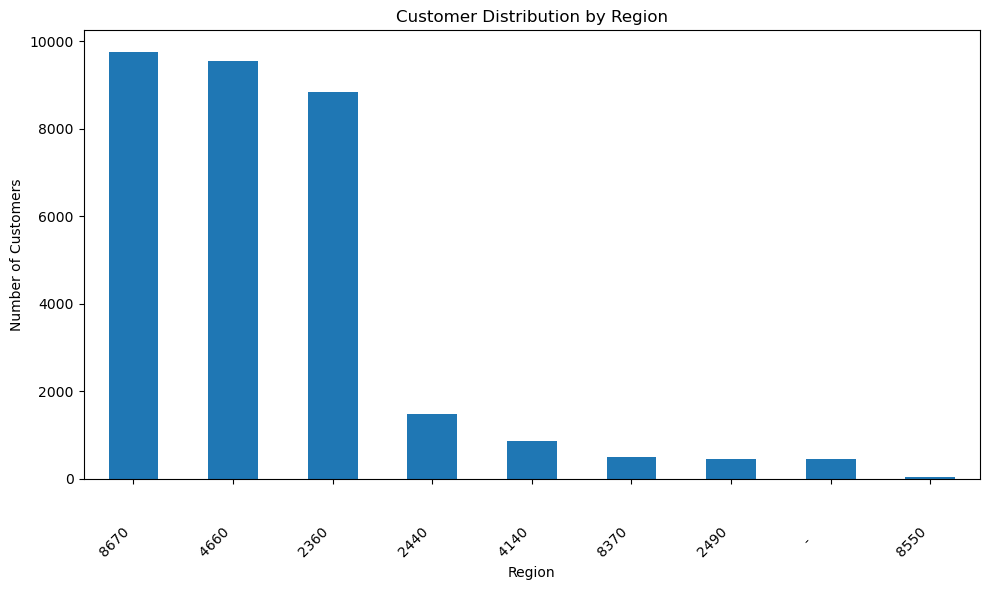

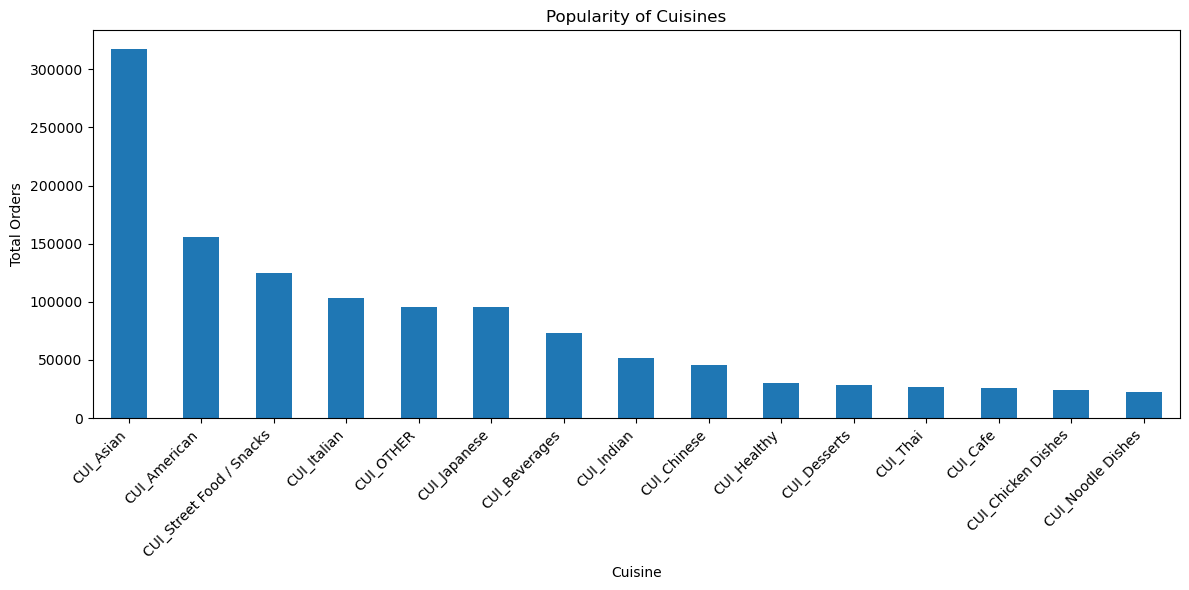

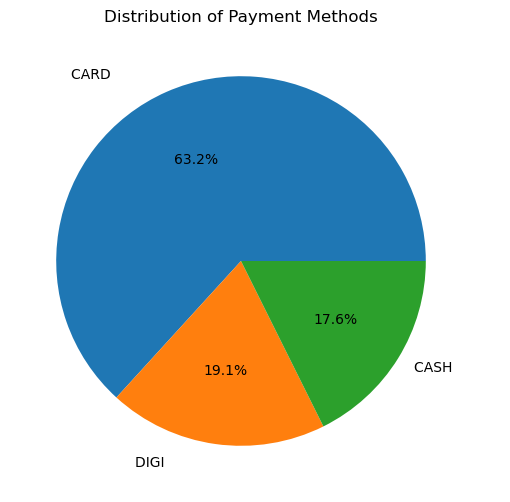

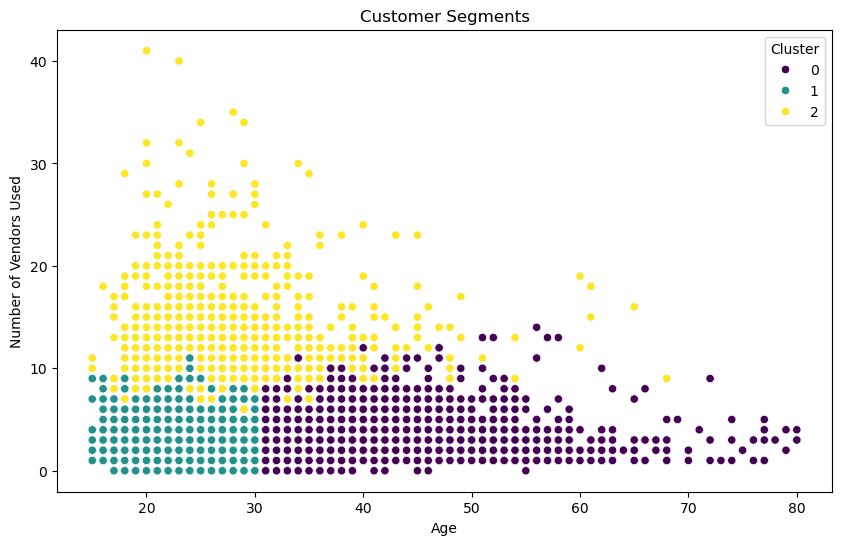

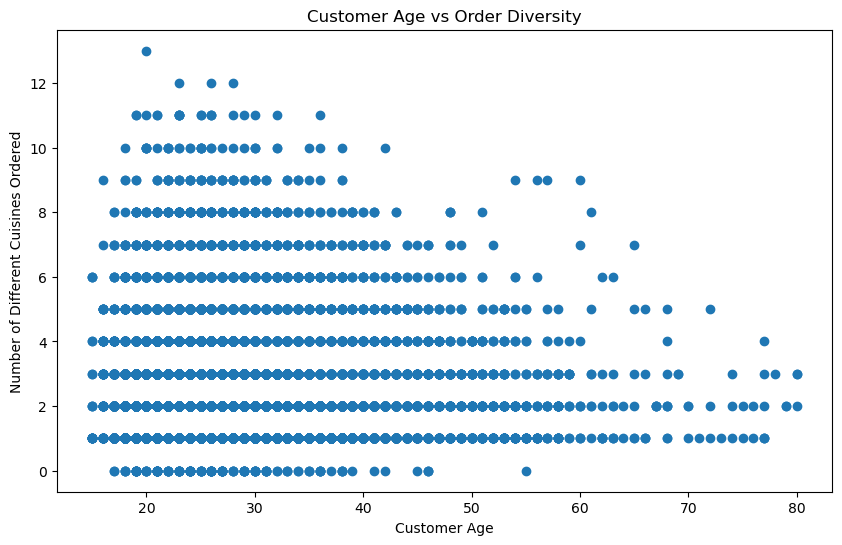

Correlation between age and order diversity: -0.0004044071148567599


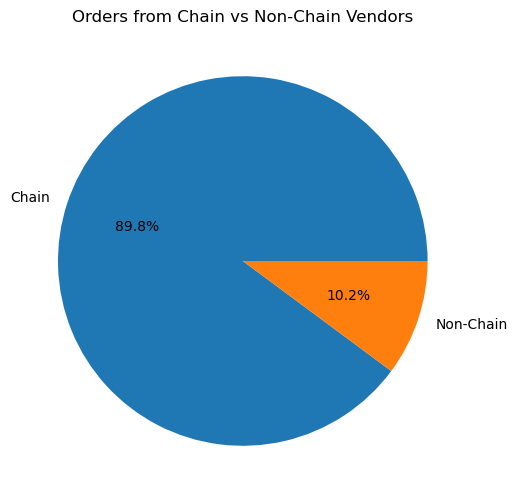

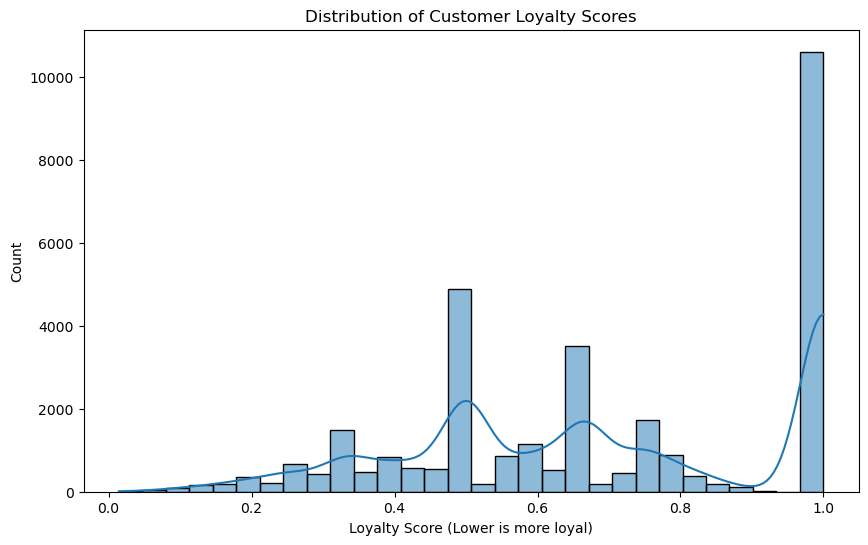

Average loyalty score: inf


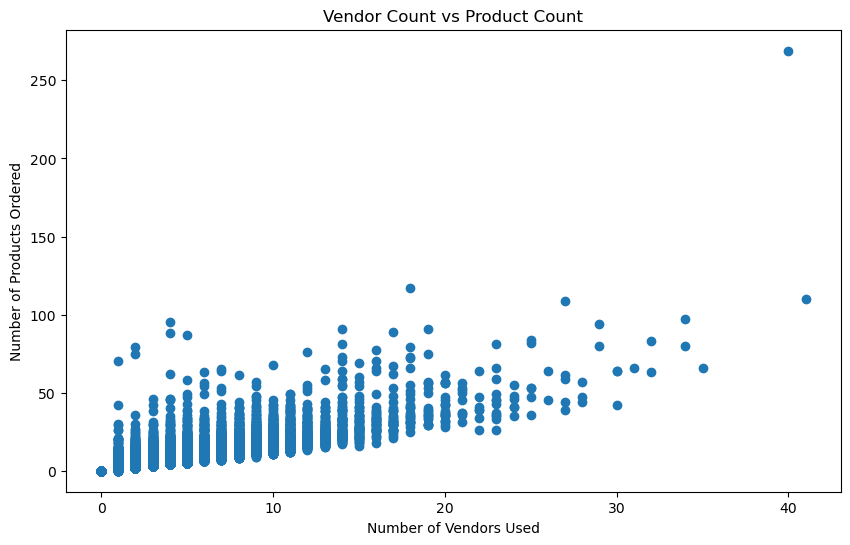

Correlation between vendor count and product count: 0.8276364706442375


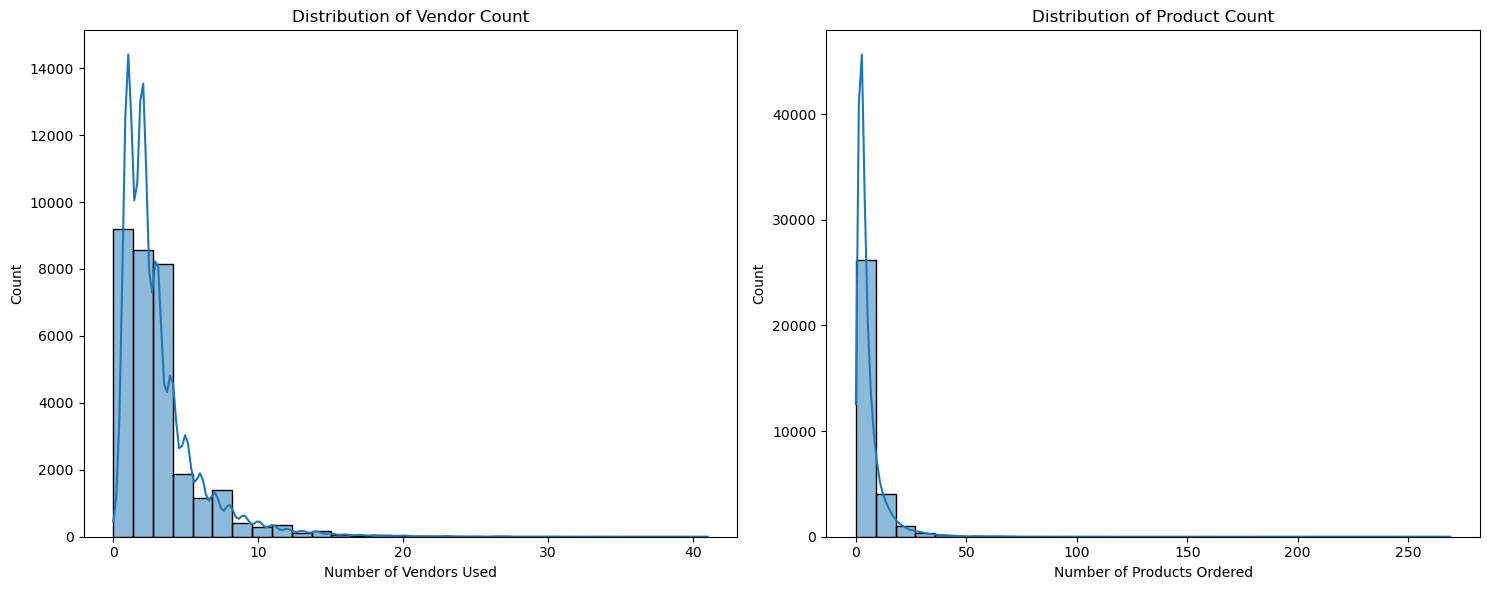

In [59]:

# 1. Data Overview and Preprocessing
print(df.info())
print(df.isnull().sum())

# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# 2. Customer Demographics
# Age distribution (we've already done this)

# Region distribution
region_counts = df['customer_region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Cuisine Preferences
cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
cuisine_popularity = df[cuisine_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
cuisine_popularity.plot(kind='bar')
plt.title('Popularity of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Payment and Promotion Analysis
payment_method_counts = df['payment_method'].value_counts()
plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

# 6. Customer Segmentation
# Select features for clustering
features = ['customer_age', 'vendor_count', 'product_count']
X = df[features].dropna()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='customer_age', y='vendor_count', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Number of Vendors Used')
plt.show()

#Relationship between customer age and order diversity:
df['order_diversity'] = df[cuisine_cols].astype(bool).sum(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['customer_age'], df['order_diversity'])
plt.title('Customer Age vs Order Diversity')
plt.xlabel('Customer Age')
plt.ylabel('Number of Different Cuisines Ordered')
plt.show()

print("Correlation between age and order diversity:", 
      df['customer_age'].corr(df['order_diversity']))


#chain vs no chain
chain_orders = df[df['is_chain'] > 0]['product_count'].sum()
non_chain_orders = df[df['is_chain'] == 0]['product_count'].sum()

plt.figure(figsize=(8, 6))
plt.pie([chain_orders, non_chain_orders], labels=['Chain', 'Non-Chain'], autopct='%1.1f%%')
plt.title('Orders from Chain vs Non-Chain Vendors')
plt.show()


#costumer loyalty
df['loyalty_score'] = df['vendor_count'] / df['product_count']
plt.figure(figsize=(10, 6))
sns.histplot(df['loyalty_score'], bins=30, kde=True)
plt.title('Distribution of Customer Loyalty Scores')
plt.xlabel('Loyalty Score (Lower is more loyal)')
plt.ylabel('Count')
plt.show()

print("Average loyalty score:", df['loyalty_score'].mean())

#regional cusine preferences
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'])
plt.title('Vendor Count vs Product Count')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Number of Products Ordered')
plt.show()

print("Correlation between vendor count and product count:", 
      df['vendor_count'].corr(df['product_count']))

# Additional analysis: Distribution of vendor and product counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['vendor_count'], bins=30, kde=True, ax=ax1)
ax1.set_title('Distribution of Vendor Count')
ax1.set_xlabel('Number of Vendors Used')

sns.histplot(df['product_count'], bins=30, kde=True, ax=ax2)
ax2.set_title('Distribution of Product Count')
ax2.set_xlabel('Number of Products Ordered')

plt.tight_layout()
plt.show()


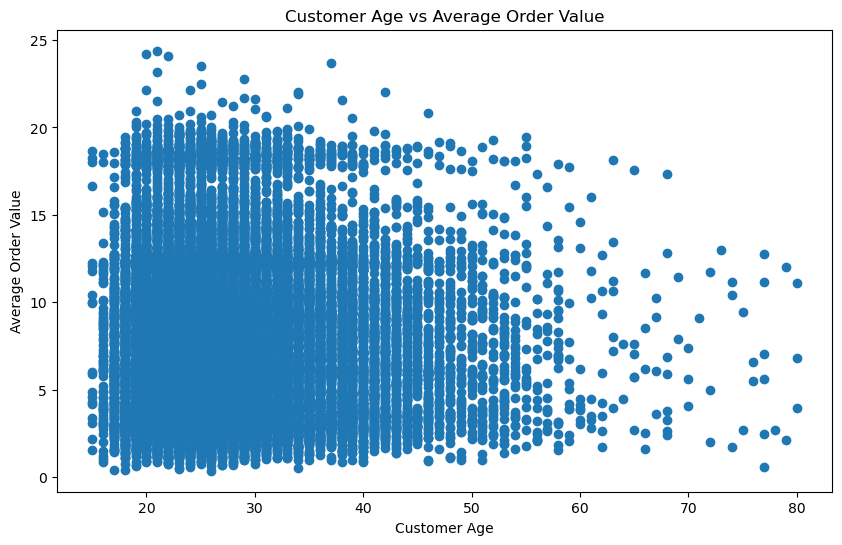

Correlation between age and average order value: nan


/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


In [60]:
# Assuming 'total_spend' is the sum of all cuisine columns
df['total_spend'] = df[cuisine_cols].sum(axis=1)
df['avg_order_value'] = df['total_spend'] / df['product_count']

plt.figure(figsize=(10, 6))
plt.scatter(df['customer_age'], df['avg_order_value'])
plt.title('Customer Age vs Average Order Value')
plt.xlabel('Customer Age')
plt.ylabel('Average Order Value')
plt.show()

print("Correlation between age and average order value:", 
      df['customer_age'].corr(df['avg_order_value']))

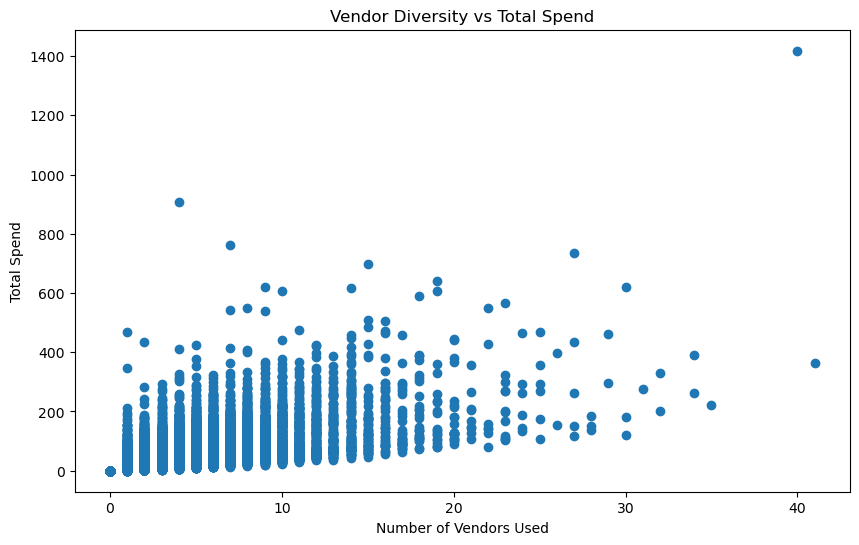

Correlation between vendor count and total spend: 0.6508818224337227


In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['total_spend'])
plt.title('Vendor Diversity vs Total Spend')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Total Spend')
plt.show()

print("Correlation between vendor count and total spend:", 
      df['vendor_count'].corr(df['total_spend']))

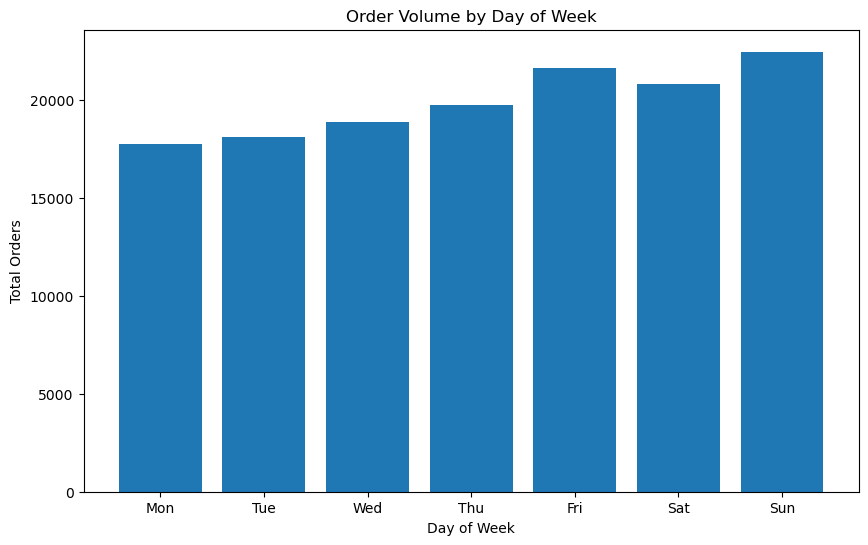

In [62]:
day_cols = [col for col in df.columns if col.startswith('DOW_')]
day_orders = df[day_cols].sum()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
plt.bar(days, day_orders)
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')
plt.show()

/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_88215/592959414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()


<Figure size 1200x600 with 0 Axes>

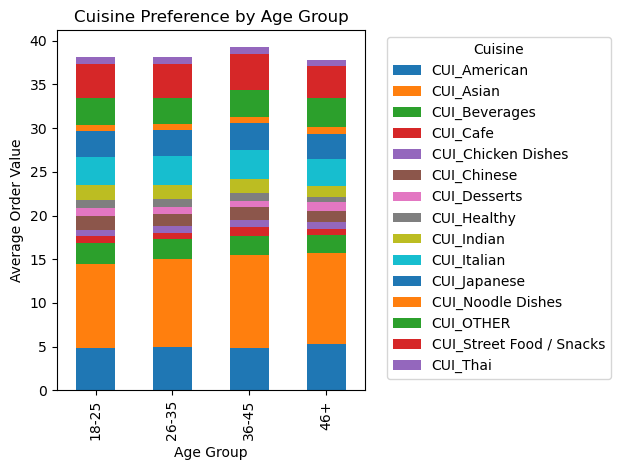

In [63]:
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '46+'])
cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()

plt.figure(figsize=(12, 6))
cuisine_by_age.plot(kind='bar', stacked=True)
plt.title('Cuisine Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/vw/pymryqyn3hv91xzpkt7_kblw0000gn/T/ipykernel_88215/942376764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()


<Figure size 1200x600 with 0 Axes>

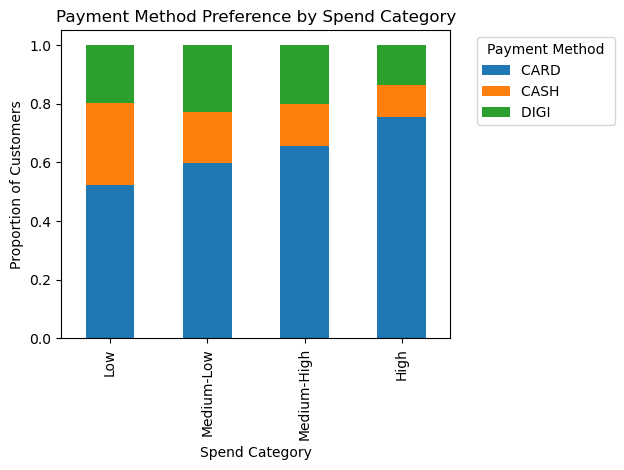

In [64]:
df['spend_category'] = pd.qcut(df['total_spend'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
payment_by_spend.plot(kind='bar', stacked=True)
plt.title('Payment Method Preference by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Proportion of Customers')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

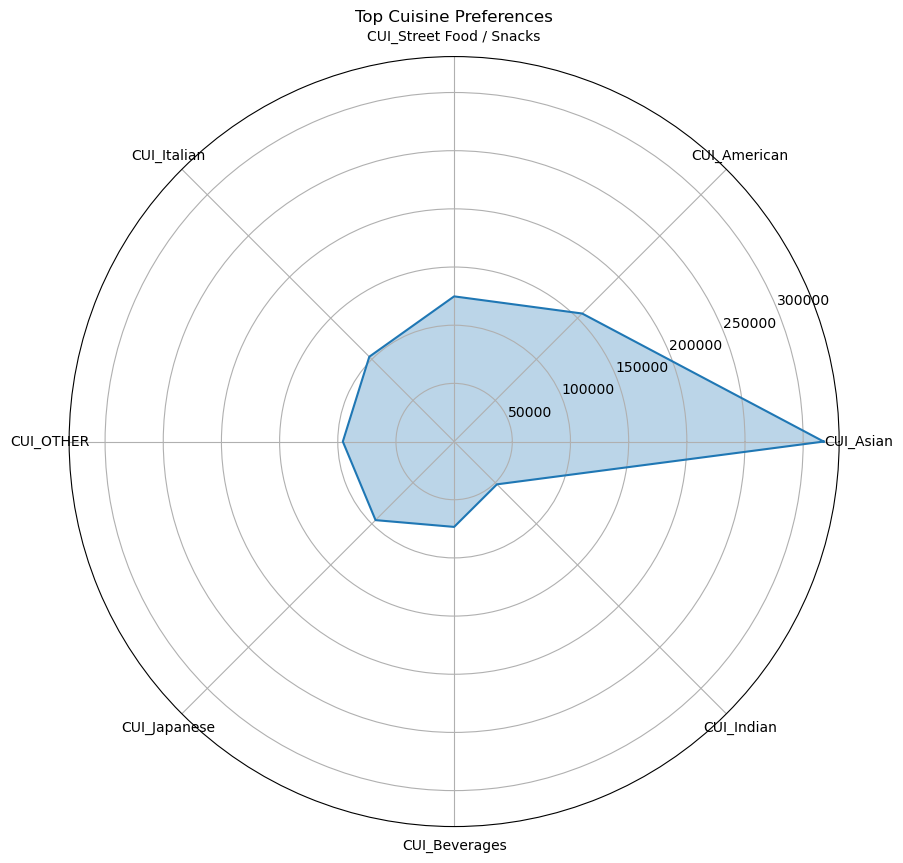

In [65]:
import matplotlib.pyplot as plt
from math import pi

# Prepare data
cuisine_totals = df[cuisine_cols].sum().sort_values(ascending=False)
top_cuisines = cuisine_totals.nlargest(8)

# Calculate angles for each cuisine
angles = [n / float(len(top_cuisines)) * 2 * pi for n in range(len(top_cuisines))]
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.plot(angles, list(top_cuisines.values) + [top_cuisines.values[0]])
ax.fill(angles, list(top_cuisines.values) + [top_cuisines.values[0]], alpha=0.3)

# Set labels
plt.xticks(angles[:-1], top_cuisines.index)
plt.title('Top Cuisine Preferences')
plt.show()

<Figure size 2000x1000 with 0 Axes>

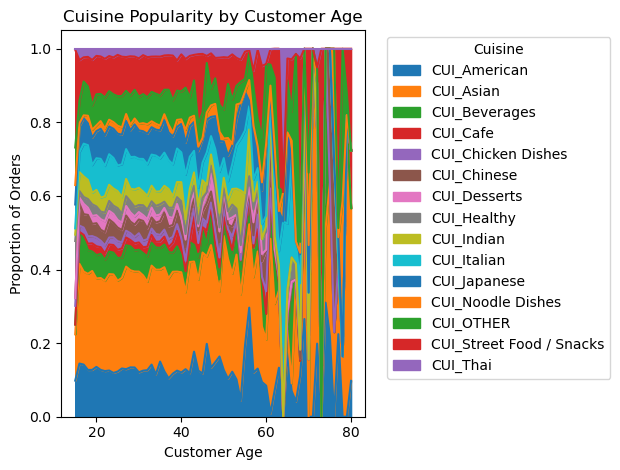

In [66]:
cuisine_age = df.groupby('customer_age')[cuisine_cols].sum()
cuisine_age_pct = cuisine_age.div(cuisine_age.sum(axis=1), axis=0)

plt.figure(figsize=(20, 10))
cuisine_age_pct.plot.area(stacked=True)
plt.title('Cuisine Popularity by Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Proportion of Orders')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [67]:

# from pandas_profiling import ProfileReport

# # Generate the profile report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# # Save the report as an HTML file
# profile.to_file("pandas_profiling_report.html")

# # Provide a link to the HTML file
# from IPython.display import display, HTML
# display(HTML('<a href="pandas_profiling_report.html" target="_blank">Open Pandas Profiling Report</a>'))




Mean customer age: 27.51


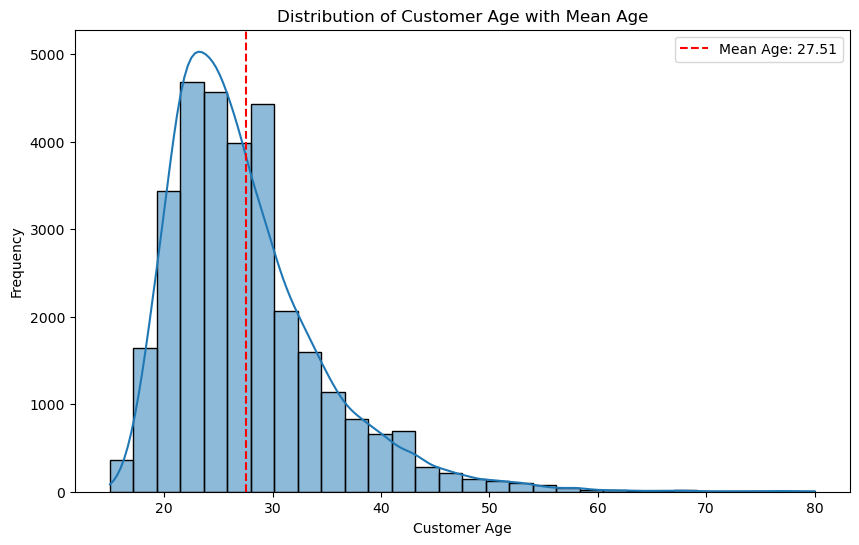

In [68]:
mean_customer_age = df['customer_age'].mean()
print(f"Mean customer age: {mean_customer_age:.2f}")
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'].dropna(), bins=30, kde=True)
plt.axvline(mean_customer_age, color='r', linestyle='--', label=f'Mean Age: {mean_customer_age:.2f}')
plt.title('Distribution of Customer Age with Mean Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [69]:
# Find the age with the maximum order count
max_order_age = age_order_counts.idxmax()
max_order_count = age_order_counts.max()

print(f"The age where customers order the most is {max_order_age} with {max_order_count} orders.")

# Plotting the distribution of orders by age
plt.figure(figsize=(12, 6))
sns.barplot(x=age_order_counts.index, y=age_order_counts.values, palette='viridis')
plt.title('Distribution of Orders by Age')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



NameError: name 'age_order_counts' is not defined

In [266]:
# Filter only numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate the range for numerical columns
numerical_ranges = df[numerical_columns].max() - df[numerical_columns].min()

# Display the ranges
print(numerical_ranges)


customer_age                  65.00
vendor_count                  41.00
product_count                269.00
is_chain                      83.00
first_order                   90.00
last_order                    90.00
CUI_American                 280.21
CUI_Asian                    896.71
CUI_Beverages                229.22
CUI_Cafe                     326.10
CUI_Chicken Dishes           219.66
CUI_Chinese                  739.73
CUI_Desserts                 230.07
CUI_Healthy                  255.81
CUI_Indian                   309.07
CUI_Italian                  468.33
CUI_Japanese                 706.14
CUI_Noodle Dishes            275.11
CUI_OTHER                    366.08
CUI_Street Food / Snacks     454.45
CUI_Thai                     136.38
DOW_0                         16.00
DOW_1                         17.00
DOW_2                         15.00
DOW_3                         17.00
DOW_4                         16.00
DOW_5                         20.00
DOW_6                       

In [267]:
# Calculate the variance for all numerical columns
numerical_variance = df.var(numeric_only=True)
print(numerical_variance)

customer_age                  51.278464
vendor_count                   7.681697
product_count                 48.403844
is_chain                      15.820735
first_order                  581.248008
last_order                   539.452806
CUI_American                 135.816138
CUI_Asian                    555.278661
CUI_Beverages                 71.905897
CUI_Cafe                      41.308027
CUI_Chicken Dishes            13.375645
CUI_Chinese                   67.104846
CUI_Desserts                  27.666211
CUI_Healthy                   33.995776
CUI_Indian                    55.401738
CUI_Italian                  126.517271
CUI_Japanese                 103.649729
CUI_Noodle Dishes             20.579441
CUI_OTHER                     95.419677
CUI_Street Food / Snacks     241.756071
CUI_Thai                      19.651905
DOW_0                          1.027387
DOW_1                          1.090124
DOW_2                          1.093922
DOW_3                          1.144197


In [268]:
# Calculate the standard deviation for each numerical column
numerical_std = df.std(numeric_only=True)
print(numerical_std)

customer_age                 7.160898
vendor_count                 2.771587
product_count                6.957287
is_chain                     3.977529
first_order                 24.109086
last_order                  23.226123
CUI_American                11.654018
CUI_Asian                   23.564351
CUI_Beverages                8.479734
CUI_Cafe                     6.427132
CUI_Chicken Dishes           3.657273
CUI_Chinese                  8.191755
CUI_Desserts                 5.259868
CUI_Healthy                  5.830590
CUI_Indian                   7.443234
CUI_Italian                 11.247990
CUI_Japanese                10.180851
CUI_Noodle Dishes            4.536457
CUI_OTHER                    9.768300
CUI_Street Food / Snacks    15.548507
CUI_Thai                     4.433047
DOW_0                        1.013601
DOW_1                        1.044090
DOW_2                        1.045907
DOW_3                        1.069672
DOW_4                        1.088122
DOW_5       

In [269]:
def fix_hr0(df):
    """
    Fix HR_0 values by comparing total DOW orders with sum of HR orders.
    If there's a mismatch, assign missing orders to HR_0.
    """
    # Calculate total orders from DOW columns
    dow_cols = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
    total_dow_orders = df[dow_cols].sum(axis=1)
    
    # Calculate total orders from HR columns (excluding HR_0)
    hr_cols = [f'HR_{i}' for i in range(1, 24)]  # HR_1 to HR_23
    total_hr_orders = df[hr_cols].sum(axis=1)
    
    # Calculate missing orders
    missing_orders = total_dow_orders - total_hr_orders
    
    # Update HR_0 with missing orders where the difference is positive
    df['HR_0'] = np.where(missing_orders > 0, missing_orders, 0)
    
    # Print summary of changes
    total_fixed = (missing_orders > 0).sum()
    total_orders_added = missing_orders[missing_orders > 0].sum()
    
    print(f"Fixed {total_fixed} rows")
    print(f"Added {total_orders_added} orders to HR_0")
    print("\nVerification:")
    print(f"Total DOW orders: {total_dow_orders.sum()}")
    print(f"Total HR orders after fix: {df[['HR_' + str(i) for i in range(24)]].sum().sum()}")
    
    return df

# Apply the fix
df = fix_hr0(df)

# Optional: Verify a few examples
print("\nExample rows after fix:")
sample_rows = df[df['HR_0'] > 0].head()
for idx, row in sample_rows.iterrows():
    dow_sum = sum(row[f'DOW_{i}'] for i in range(7))
    hr_sum = sum(row[f'HR_{i}'] for i in range(24))
    print(f"\nCustomer ID: {row['customer_id']}")
    print(f"DOW total: {dow_sum}")
    print(f"HR total: {hr_sum}")
    print(f"HR_0 value: {row['HR_0']}")

Fixed 1165 rows
Added 1553 orders to HR_0

Verification:
Total DOW orders: 139313
Total HR orders after fix: 139313

Example rows after fix:

Customer ID: ae38da6386  
DOW total: 2
HR total: 2
HR_0 value: 1

Customer ID: a21a839c77  
DOW total: 4
HR total: 4
HR_0 value: 1

Customer ID: 9237d23413  
DOW total: 4
HR total: 4
HR_0 value: 1

Customer ID: 8c6ffd7357  
DOW total: 3
HR total: 3
HR_0 value: 1

Customer ID: 67c6c9f9c4  
DOW total: 3
HR total: 3
HR_0 value: 1


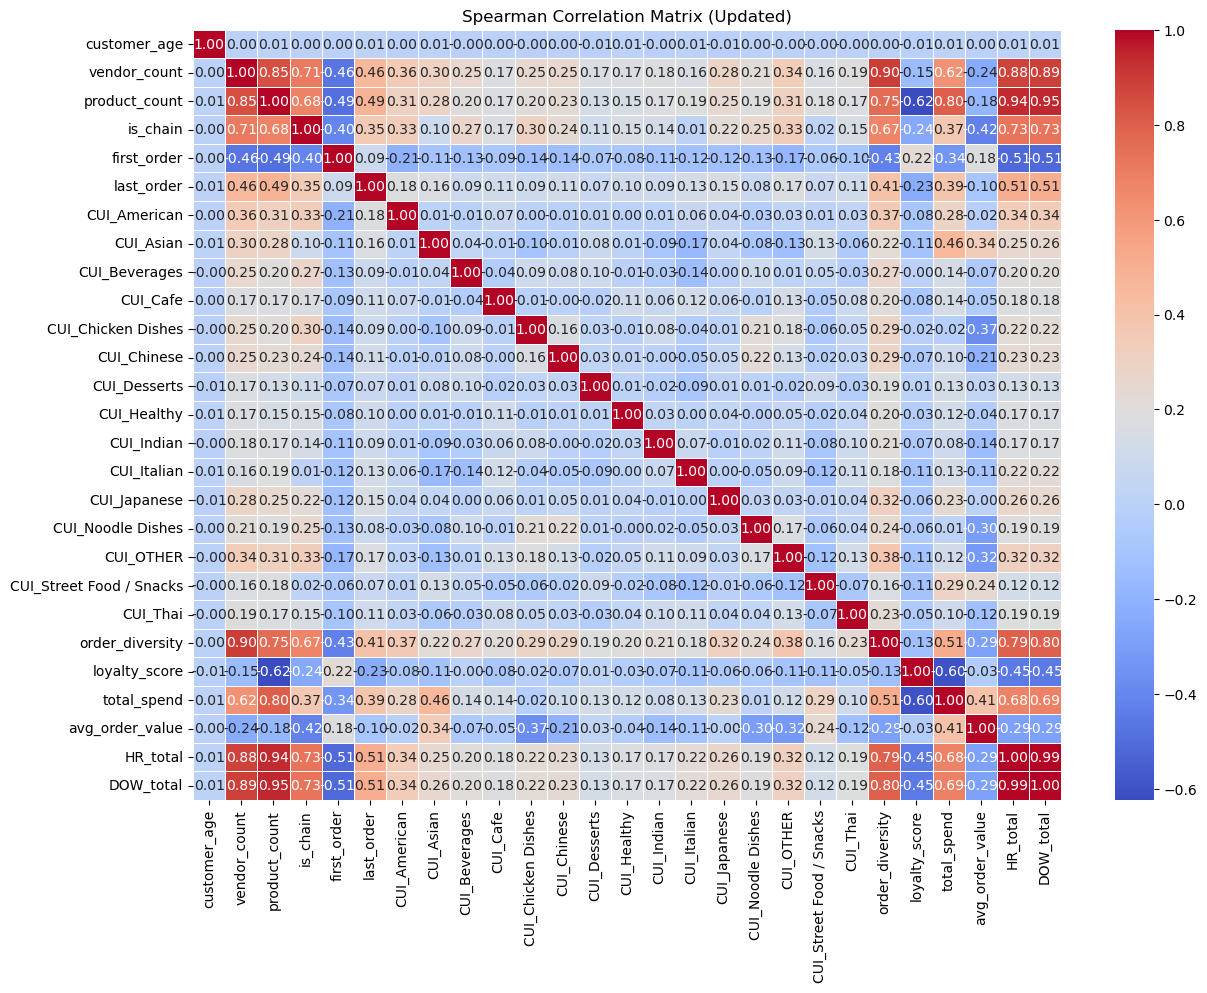

                          customer_age  vendor_count  product_count  is_chain  \
customer_age                  1.000000      0.004341       0.010332  0.003150   
vendor_count                  0.004341      1.000000       0.845161  0.707848   
product_count                 0.010332      0.845161       1.000000  0.679435   
is_chain                      0.003150      0.707848       0.679435  1.000000   
first_order                   0.000091     -0.464799      -0.485459 -0.403855   
last_order                    0.013043      0.458495       0.485475  0.348624   
CUI_American                  0.003999      0.355076       0.313466  0.334014   
CUI_Asian                     0.005667      0.301082       0.283945  0.098269   
CUI_Beverages                -0.004678      0.253354       0.196112  0.269773   
CUI_Cafe                      0.002705      0.174615       0.169794  0.169920   
CUI_Chicken Dishes           -0.002405      0.249503       0.203163  0.302871   
CUI_Chinese                 

In [34]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Compute the Spearman correlation matrix
spearman_corr_matrix = numerical_df.corr(method='spearman')

# Sum more appearing columns to one of each type
# For example, summing all 'HR_' columns to 'HR_total'
hr_columns = [col for col in numerical_df.columns if col.startswith('HR_')]
numerical_df['HR_total'] = numerical_df[hr_columns].sum(axis=1)

# Similarly, summing all 'DOW_' columns to 'DOW_total'
dow_columns = [col for col in numerical_df.columns if col.startswith('DOW_')]
numerical_df['DOW_total'] = numerical_df[dow_columns].sum(axis=1)

# Drop the individual 'HR_' and 'DOW_' columns
numerical_df = numerical_df.drop(columns=hr_columns + dow_columns)

# Compute the Spearman correlation matrix again with the updated dataframe
spearman_corr_matrix_updated = numerical_df.corr(method='spearman')
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr_matrix_updated, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix (Updated)')
plt.show()
# Display the updated Spearman correlation matrix
print(spearman_corr_matrix_updated)

In [70]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Select the columns of interest
categorical_columns = ['customer_id', 'customer_region', 'last_promo', 'payment_method']

# Create a dataframe to store the results
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Calculate Cramér's V for each pair of columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            if not confusion_matrix.empty:
                cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
            else:
                cramers_v_matrix.loc[col1, col2] = np.nan

# Convert the results to numeric
cramers_v_matrix = cramers_v_matrix.astype(float)

# Display the Cramér's V matrix
print(cramers_v_matrix)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [71]:
null_customer_age = df['customer_age'].isnull().sum()
print(f"Number of null values in 'customer_age': {null_customer_age}")

Number of null values in 'customer_age': 727
